In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mpl
mpl.rcParams["axes.unicode_minus"] = False

# 서울시 공공 자전거 대여 분석

### 1.  데이터 준비

In [2]:
bike =pd.read_csv("data/SeoulBikeData.csv")
bike.head(10)

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


In [10]:
bike.info() # 안에있는 속성 가져오는것

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

In [11]:
#### 시간대별로 평균 몇 대가 대여 되었을까?
#### 계절별로 평균 몇대가 대여 되었을까?


bike.groupby("Seasons")["Rented Bike Count"].mean()


Seasons
Autumn     819.597985
Spring     730.031250
Summer    1034.073370
Winter     225.541204
Name: Rented Bike Count, dtype: float64

Text(16, 150, '퇴근')

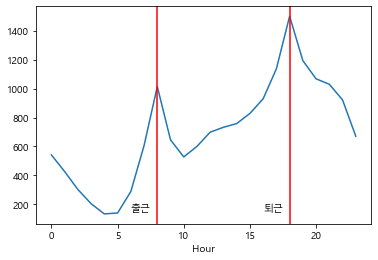

In [21]:
#### 시각화

bike.groupby("Hour")["Rented Bike Count"].mean().plot()

plt.axvline(x=8, color="r")
plt.axvline(x=18, color="r") # 수직선 그어 주는 함수
plt.text(6,150,"출근")
plt.text(16,150,"퇴근")


In [26]:
##### 2016년 1월 1일은 금요일이였다. date변수에서 요일(date)을 뽑아서 파생변수 만들기

# loc 열에서 데이터만 뽑기
bike.loc[:,"Date"] = pd.to_datetime(bike["Date"] , format="%d/%m/%Y")
# bike.info()
# bike["Date"] -pd.to_datetime('2016-01-01')
bike["Date"] - pd.to_datetime('2016-01-01')
diff = (bike["Date"] - pd.to_datetime('2016-01-01')).astype(str)

diff_num=diff.str.split(" ",expand=True)[0].astype(int)
diff_num

def weekdays(x):
    if x % 7 == 0:
        return "금요일"
    elif x % 7 == 1:
        return "토요일"
    elif x % 7 == 2:
        return "일요일"
    elif x % 7 == 3:
        return "월요일"
    elif x % 7 == 4:
        return "화요일"
    elif x % 7 == 5:
        return "수요일"
    elif x % 7 == 6:
        return "목요일"
    
bike["weekdays"] = diff_num.apply(weekdays)
bike.head(10)

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,weekdays,weekdays2
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,금요일,0
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,금요일,0
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes,금요일,0
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,금요일,0
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes,금요일,0
5,2017-12-01,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes,금요일,0
6,2017-12-01,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes,금요일,0
7,2017-12-01,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes,금요일,0
8,2017-12-01,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes,금요일,0
9,2017-12-01,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes,금요일,0


In [29]:

### 위에꺼 너무 복잡.... 차라리 이걸로하자

bike["weekdays2"]=((pd.to_datetime(bike["Date"]) - pd.to_datetime('2016-01-01')).dt.days)%7
bike["weekdays2"].map({0:"금요일",1:"토요일",2:"일요일",3:"월요일",
                       4:"화요일",5:"수요일",6:"목요일"})

bike.sample(10)

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,weekdays,weekdays2
4020,2018-05-17,467,12,21.7,96,0.8,1773,21.0,0.81,1.5,0.0,Spring,No Holiday,Yes,목요일,6
1064,2018-01-14,81,8,-3.8,79,0.8,412,-6.9,0.00,0.0,0.0,Winter,No Holiday,Yes,일요일,2
8372,2018-11-14,1269,20,10.5,52,1.4,1153,1.0,0.00,0.0,0.0,Autumn,No Holiday,Yes,수요일,5
5957,2018-08-06,258,5,28.3,83,1.7,969,25.1,0.00,0.0,0.0,Summer,No Holiday,Yes,월요일,3
496,2017-12-21,301,16,4.1,51,1.8,1112,-5.1,0.48,0.0,0.9,Winter,No Holiday,Yes,목요일,6
5047,2018-06-29,883,7,22.0,97,0.9,269,21.4,0.03,0.0,0.0,Summer,No Holiday,Yes,금요일,0
7335,2018-10-02,0,15,21.8,38,2.6,1913,6.8,2.22,0.0,0.0,Autumn,No Holiday,No,화요일,4
7269,2018-09-29,1781,21,20.1,54,1.2,2000,10.4,0.00,0.0,0.0,Autumn,No Holiday,Yes,토요일,1
1401,2018-01-28,104,9,-7.8,41,1.8,1923,-18.7,0.17,0.0,0.0,Winter,No Holiday,Yes,일요일,2
3581,2018-04-29,138,5,9.7,63,1.1,1304,2.9,0.00,0.0,0.0,Spring,No Holiday,Yes,일요일,2


In [71]:
### 요일별로 평균 몇대가 대여 되었을까?

bike.groupby("weekdays")["Rented Bike Count"].mean()

weekdays
금요일    747.117925
목요일    690.704327
수요일    740.349359
월요일    730.563301
일요일    625.155449
토요일    709.528846
화요일    687.977564
Name: Rented Bike Count, dtype: float64

<AxesSubplot:xlabel='weekdays', ylabel='Rented Bike Count'>

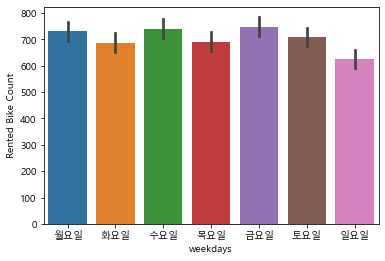

In [40]:
### 막대 그래프로 비교 시각화

#sns.barplot(x="Seasons", y="Rented Bike Count", data=bike,
           #order=["Spring","Summer","Autumn","Winter"])


sns.barplot(x="weekdays", y="Rented Bike Count", data=bike,
           order=["월요일","화요일","수요일","목요일","금요일","토요일","일요일"])

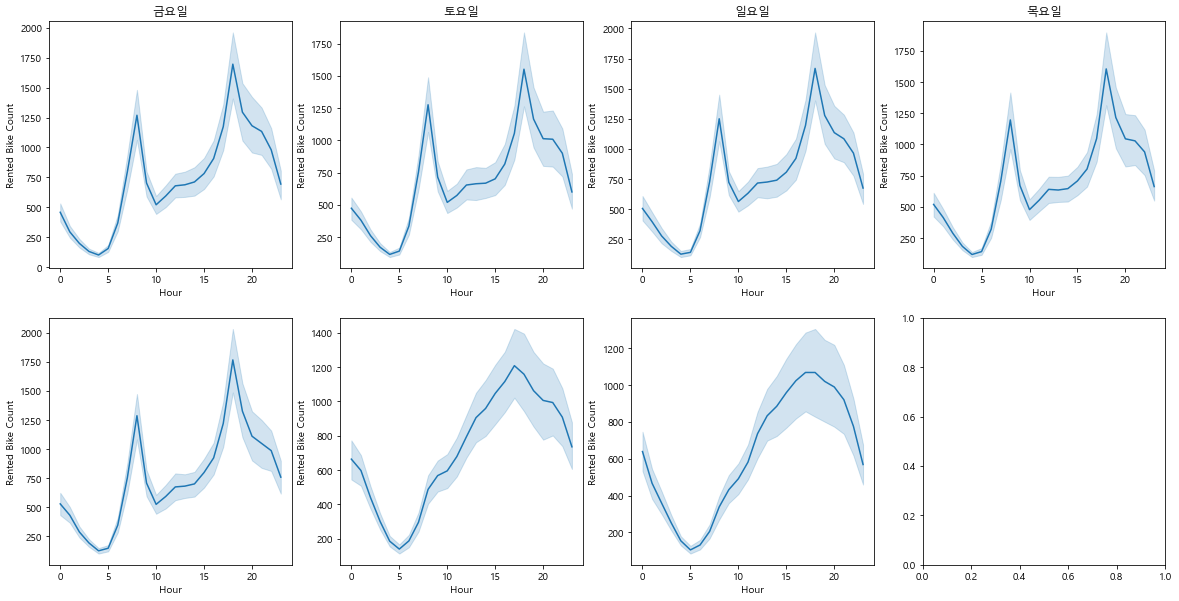

In [78]:
#### 요일 별로 시간대별 그래프로 시각화

f, ax = plt.subplots(2,4,figsize=(20,10))

weekdays_list =["월요일","화요일","수요일","목요일","금요일","토요일","일요일"]

for i in range(7):
    sns.lineplot("Hour","Rented Bike Count", 
                 data=bike.loc[bike["weekdays"]== weekdays_list[i]],
    ax= ax[i//4,i%4])
    
    ax[1//4,i%4].set_title(weekdays_list[i])

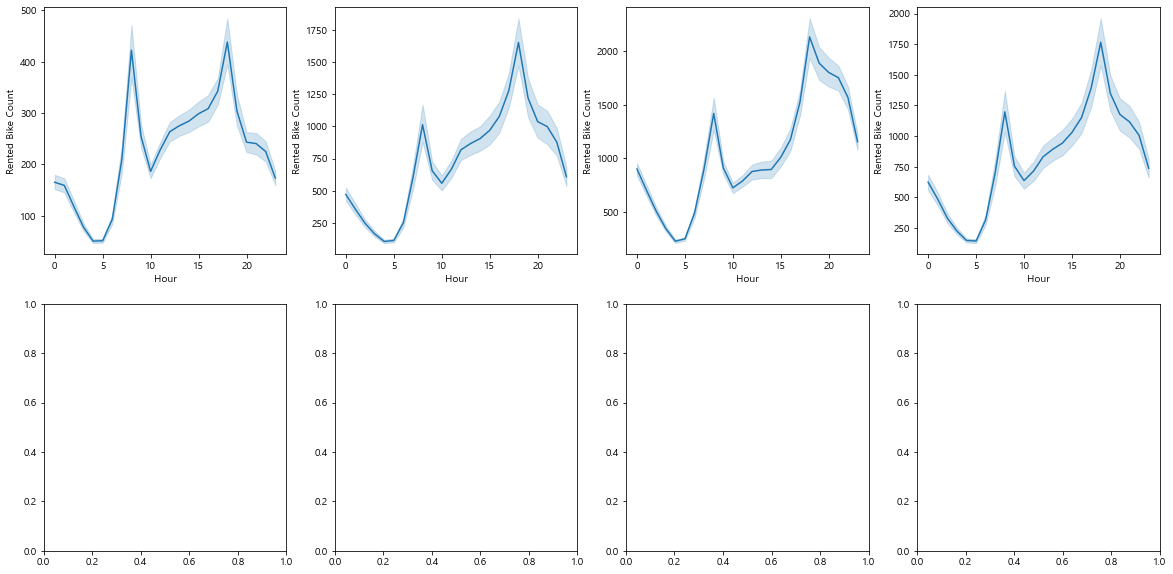

In [55]:
#### 시즌 별로 시간대별 그래프로 시각화

f, ax = plt.subplots(2,4,figsize=(20,10))

Seasons_list =["Winter","Spring","Summer","Autumn"]

for i in range(4):
    sns.lineplot("Hour","Rented Bike Count", 
                 data=bike.loc[bike["Seasons"]== Seasons_list[i]],
    ax= ax[i//4,i%4])
    
    ax[1//4,i%4].set_title(Seasons_list[i])
    
    
## data=bike.loc[bike["Seasons"]== Seasons_list[i]] 
# 데이터의 시즌과 리스트의 시즌과 같다.
# ax[1//4,i%4].set_title(Seasons_list[i]) 제목 붙여주기
# // 는 나누기 후에 소수점을 버리고 정수만 구함, % 나누기 연산후에 몫은 버리고 나머지만 구함

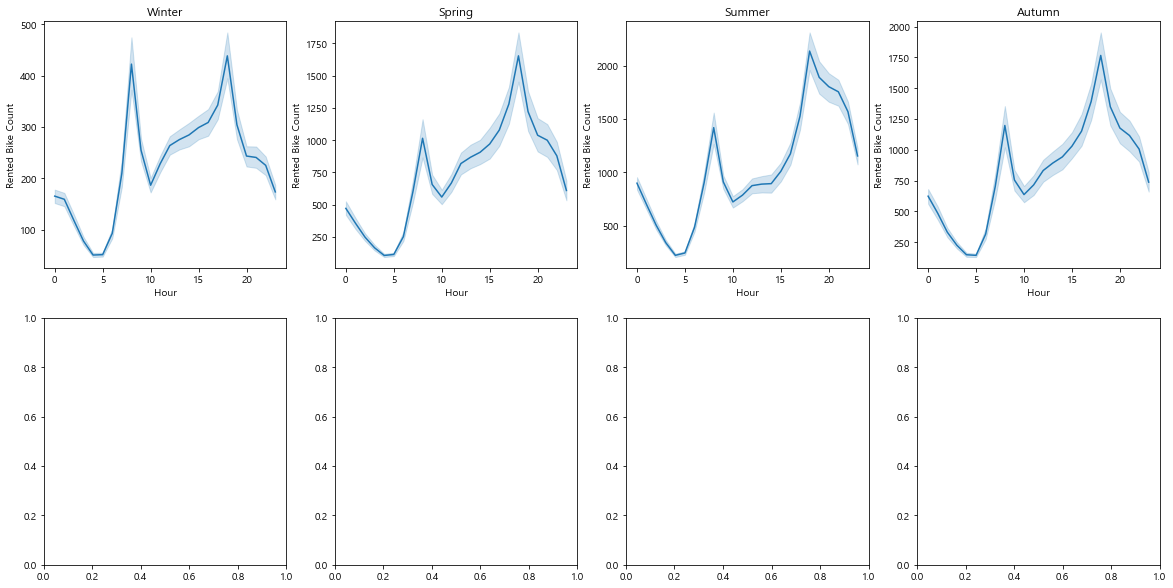

In [63]:
#### 시즌 별로 시간대별 그래프로 시각화

f, ax = plt.subplots(2,4,figsize=(20,10))

Seasons_list =["Winter","Spring","Summer","Autumn"]

for i in range(4):
    sns.lineplot("Hour","Rented Bike Count", 
                 data=bike.loc[bike["Seasons"]== Seasons_list[i]],
    ax= ax[i//4,i%4])
    
    ax[1//4,i%4].set_title(Seasons_list[i])
    
    
## data=bike.loc[bike["Seasons"]== Seasons_list[i]] 
# 데이터의 시즌과 리스트의 시즌과 같다.
# ax[1//4,i%4].set_title(Seasons_list[i]) 제목 붙여주기
# // 는 나누기 후에 소수점을 버리고 정수만 구함, % 나누기 연산후에 몫은 버리고 나머지만 구함